## 1. Data

In [1]:
# conda list

# packages in environment at C:\Users\ppink_hongg\anaconda3:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0                    py38_0  
alabaster                 0.7.12                     py_0  
anaconda                  2020.11                  py38_0  
anaconda-client           1.7.2                    py38_0  
anaconda-navigator        1.10.0                   py38_0  
anaconda-project          0.8.4                      py_0  
argh                      0.26.2                   py38_0  
argon2-cffi               20.1.0           py38he774522_1  
asn1crypto                1.4.0                      py_0  
astroid                   2.4.2                    py38_0  
astropy                   4.0.2            py38he774522_0  
async_generator           1.10                       py_0  
atomicwrites              1.4.0                      py_0  
attrs                     20.3.0             pyhd3eb1b0_0  
autopep8                  1.5.

In [27]:
# conda install pandas-datareader

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

# All requested packages already installed.




In [28]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime

In [29]:
start = datetime(2019, 1, 2) # start = '2019-01-02'
end = datetime(2020, 12, 30) # end = '2020-12-30'

# 삼성전자: 005930.KS
df = pdr.DataReader('005930.KS', 'yahoo', start, end) 
# df = pdr.get_data_yahoo('005930.KS', start, end)

# 컬럼명 변경
# df.columns = ['h', 'l', 'o', 'c', 'v', 'adjc']

In [30]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,39400.0,38550.0,39400.0,38750.0,7847664.0,36882.367188
2019-01-03,38550.0,37450.0,38300.0,37600.0,12471493.0,35787.796875
2019-01-04,37600.0,36850.0,37450.0,37450.0,14108958.0,35645.027344
2019-01-07,38900.0,37800.0,38000.0,38750.0,12748997.0,36882.367188
2019-01-08,39200.0,37950.0,38000.0,38100.0,12756554.0,36263.699219


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 493 entries, 2019-01-02 to 2020-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       493 non-null    float64
 1   Low        493 non-null    float64
 2   Open       493 non-null    float64
 3   Close      493 non-null    float64
 4   Volume     493 non-null    float64
 5   Adj Close  493 non-null    float64
dtypes: float64(6)
memory usage: 27.0 KB


In [32]:
df.shape

(493, 6)

In [33]:
df['Close']
# df['Close'][0]

Date
2019-01-02    38750.0
2019-01-03    37600.0
2019-01-04    37450.0
2019-01-07    38750.0
2019-01-08    38100.0
               ...   
2020-12-23    73900.0
2020-12-24    77800.0
2020-12-28    78700.0
2020-12-29    78300.0
2020-12-30    81000.0
Name: Close, Length: 493, dtype: float64

<AxesSubplot:xlabel='Date'>

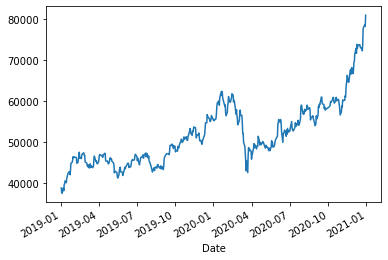

In [34]:
df['Close'].plot()

In [35]:
df_close = df.iloc[:,3]; df_close

Date
2019-01-02    38750.0
2019-01-03    37600.0
2019-01-04    37450.0
2019-01-07    38750.0
2019-01-08    38100.0
               ...   
2020-12-23    73900.0
2020-12-24    77800.0
2020-12-28    78700.0
2020-12-29    78300.0
2020-12-30    81000.0
Name: Close, Length: 493, dtype: float64

## 2. 수익률 계산

In [36]:
import numpy as np
import math

In [37]:
zerosv1 =np.zeros(493)
zerosv1[0] = 'NaN'
# type(zerosv)

In [38]:
for i in range(1, 493):
    zerosv1[i] = round((df['Close'][i] - df['Close'][i-1]) / df['Close'][i-1] * 100, 4)

# zerosv1
# np.diff

In [39]:
# 열 생성
df['rate_return'] = zerosv1

# 열 삭제
# del df['rate_return']

In [40]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,rate_return
Date,,,,,,,
2019-01-02,39400.0,38550.0,39400.0,38750.0,7847664.0,36882.367188,NaN
2019-01-03,38550.0,37450.0,38300.0,37600.0,12471493.0,35787.796875,-2.9677
2019-01-04,37600.0,36850.0,37450.0,37450.0,14108958.0,35645.027344,-0.3989
2019-01-07,38900.0,37800.0,38000.0,38750.0,12748997.0,36882.367188,3.4713
2019-01-08,39200.0,37950.0,38000.0,38100.0,12756554.0,36263.699219,-1.6774


In [41]:
zerosv2 =np.zeros(493)
zerosv2[0] = 'NaN'

for i in range(1, 493):
    zerosv2[i] = round((math.log(df['Close'][i]) - math.log(df['Close'][i-1])) * 100, 4)

df['rate_return_with_log'] = zerosv2
df.head()

,High,Low,Open,Close,Volume,Adj Close,rate_return,rate_return_with_log
Date,,,,,,,,
2019-01-02,39400.0,38550.0,39400.0,38750.0,7847664.0,36882.367188,NaN,NaN
2019-01-03,38550.0,37450.0,38300.0,37600.0,12471493.0,35787.796875,-2.9677,-3.0127
2019-01-04,37600.0,36850.0,37450.0,37450.0,14108958.0,35645.027344,-0.3989,-0.3997
2019-01-07,38900.0,37800.0,38000.0,38750.0,12748997.0,36882.367188,3.4713,3.4124
2019-01-08,39200.0,37950.0,38000.0,38100.0,12756554.0,36263.699219,-1.6774,-1.6916


<AxesSubplot:xlabel='Date'>

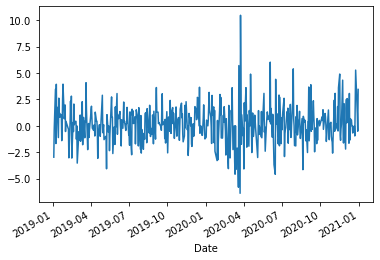

In [42]:
df['rate_return'].plot() # df['rate_return_with_log'].plot()

In [43]:
df['rate_return'].describe()

count    492.000000
mean       0.166243
std        1.810335
min       -6.387700
25%       -0.911675
50%        0.160600
75%        1.160675
max       10.470600
Name: rate_return, dtype: float64

In [44]:
# 수익률이 0인 행 필터링하기 -> Take log 불가
is_zero = df['rate_return'] == 0.0
df_rate_return_zero = df[is_zero]
len(df_rate_return_zero)

27

## 3. 계산된 수익률을 이용해 복원추출하기

In [45]:
import numpy as np
import pandas as pd

In [46]:
df.index

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2020-12-16', '2020-12-17', '2020-12-18', '2020-12-21',
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', name='Date', length=493, freq=None)

In [47]:
# df에서 DatetimeIndex 추출
# data_time = list(np.array(range(493))) # 리스트로 자료형 변환(orginal: datetime64[ns])

# for i in range(493):
    # data_time[i] = df.index[i]

# index도 자료형 변환 가능
# df.index.astype(str)

count    493.000000
mean       0.096521
std        1.693022
min       -6.387700
25%       -0.992100
50%        0.110400
75%        1.138500
max        5.704300
Name: rate_return, dtype: float64
AxesSubplot(0.125,0.2;0.775x0.68)


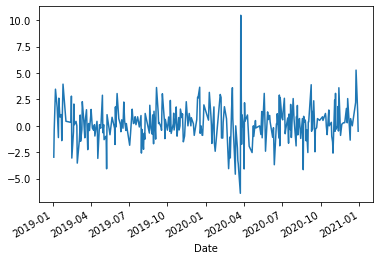

In [56]:
# random_sampling = np.random.choice(df['rate_return'], 493, replace=True )
# sample = pd.DataFrame(random_sampling, columns = ['s1'], index = data_time)
# sample.plot()

# 위와 같은 방법으로 하면 안 됨
print(df['rate_return'].sample(493, replace=True).describe())
print(df['rate_return'].sample(493, replace=True).plot())

## 4. Bootstrapping 시작 후, 1년 후의 수익률 계산해보기

In [7]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

In [92]:
conda install sp.stats

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - sp.stats

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [ ]:
# https://www.youtube.com/watch?v=8zo3C8H2AuQ

In [8]:
start = datetime(2019, 1, 2) 
end = datetime(2020, 12, 30)

df1 = pdr.DataReader('005930.KS', 'yahoo', start, end) 
df1.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,39400.0,38550.0,39400.0,38750.0,7847664.0,36882.367188
2019-01-03,38550.0,37450.0,38300.0,37600.0,12471493.0,35787.796875
2019-01-04,37600.0,36850.0,37450.0,37450.0,14108958.0,35645.027344
2019-01-07,38900.0,37800.0,38000.0,38750.0,12748997.0,36882.367188
2019-01-08,39200.0,37950.0,38000.0,38100.0,12756554.0,36263.699219


In [9]:
bootstrap = pd.DataFrame({'meanClose':[df1['Close'].sample(493, replace=True).mean() for i in range(1000)]})
bootstrap

,meanClose
0,51338.945233
1,51786.004057
2,52233.265720
3,52111.156187
4,51801.825558
...,...
995,52068.052738
996,51885.598377
997,51758.620690
998,51166.430020


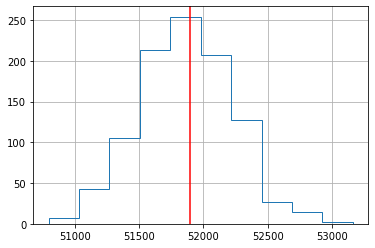

In [78]:
bootstrap.meanClose.hist(histtype='step')
plt.axvline(df1.Close.mean(), color='r')

In [79]:
bootstrap.meanClose.quantile(0.025), bootstrap.meanClose.quantile(0.975),# 95% confidenc interval


(51164.761663286, 52582.98174442191)

AttributeError: module 'scipy' has no attribute 'stats'

In [10]:
df1['Close'][-1]

81000.0

In [12]:
df1.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-23,74000.0,72300.0,72400.0,73900.0,19411326.0,73900.0
2020-12-24,78800.0,74000.0,74100.0,77800.0,32502870.0,77800.0
2020-12-28,80100.0,78200.0,79000.0,78700.0,40085044.0,78700.0
2020-12-29,78900.0,77300.0,78800.0,78300.0,30339449.0,78300.0
2020-12-30,81300.0,77300.0,77400.0,81000.0,29417421.0,81000.0
